In [ ]:
"""
<실습 데이터셋>
 - 공공데이터 포털(www.data.go.kr)
 - 국가통계포털(https://kosis.kr/index/index.do)
 - 케글(https://www.kaggle.com/)
 - AI‑Hub(https://www.aihub.or.kr/)


<아래는 시계열분석 데이터셋으로 활용가능한 예시>-------------------
1. 국토 및 지역개발 분야 재정지출 (2018–2024)
    내용: 연도별로 도시·지역·국토정보관리 등에 대한 지출 추이
    형식: CSV / JSON / XML (공공데이터포털 제공)
    적합도: 연도별 재정 지출 추이를 시계열 분석하기 좋습니다


    다운로드 링크
    https://www.data.go.kr/data/15066675/fileData.do

2. 교통 및 물류 분야 재정지출 (2022–2024)
    내용: 2022년부터 연도별로 부처별(국토교통부, 해수부 등) 지출 내역
    형식: CSV / JSON / XML
    적합도: 최근의 짧은 기간 시계열 분석용, 부처 비교에도 유용합니다


    다운로드 링크
    https://www.data.go.kr/data/15066591/fileData.do


3. 국방 분야 재정지출 (2018–2024)
    내용: 국방 부문 전반에 대한 연도별 지출 추이
    형식: CSV / JSON / XML


    적합도: 특정 부문의 정책 변화 추이를 살펴보기 좋습니다
    다운로드 링크
    https://www.data.go.kr/data/15065410/fileData.do


4. 서울 마포구 물가 시계열 데이터 (전통시장 및 대형마트 조사)
    내용: 마포구 지역의 물가 평균 추이 (시장/마트 중심)
    형식: CSV, 오픈 API 제공
    적합도: 지역별 월별 또는 주별 물가 변동 분석에 활용 가능


    다운로드 링크
    https://www.data.go.kr/data/15120828/fileData.do


5. 가스공사 삼척생산기지 전력소모 (10분 단위)
    내용: 10분 단위로 측정한 전력 사용량 데이터
    형식: CSV / XML / JSON
    적합도: 고해상도 시계열(10분 단위), 에너지 소비 분석에 최적


    다운로드 링크
    https://www.data.go.kr/data/15110989/fileData.do


6. 추가 추천 데이터 소스 – KOSIS
    KOSIS (국가통계포털)
    인구·고용·소비자물가(CPI)·산업생산지수 등 주요 통계의 월별·분기별 시계열 데이터가 다수 수록
    → 예: 고용률, CPI, 생산지수 등


    사용법: KOSIS 웹사이트에서 원하는 주제의 시계열 통계표 선택 후 다운로드 가능
    → 예: 인구, 경제지표, 노동시장 등


7. COVID‑19 연령별 일일 확진자 (Kaggle)
    내용: 2020년 이후 한국의 일일 확진자 수를 연령대별로 세분화한 데이터
    적용 사례: 팬데믹 추세 분석, 연령층별 비교, 계절성 탐지
    데이터: Kaggle에서 제공
    URL: Kaggle에서 "COVID-19 South Korea age time series" 검색하세요


8. 서울 공기질(PM₂.₅, NO₂ 등) (2017–2020)
    내용: 서울시 공공 측정소 데이터를 기반으로 대기오염 수치 데이터
    적용 사례: 시계열 예측, 계절성 분석, 이상치 탐색 등
    데이터: Kaggle "Air Quality in Seoul 2017-2020"


9. 서울 NO₂ (2008–2023)
    내용: 서울시 NO₂ 농도 데이터
    장점: 긴 기간(15년) 분석에 적합
    URL: Kaggle “NO2 in Seoul, Korea, from 2008 to 2023”


10. 한국/미국 환율 (FRED via Kaggle)
    내용: 한국 원/달러 환율 시계열 데이터
    적용 사례: 환율 변동 분석, ARIMA/GRU 예측
    URL: “South Korea / U.S. Foreign Exchange Rate”


11. 지하수 수위·수질
    내용: 전국 지하수 수량·수질 데이터(수위, EC, 녹조, 이용량 포함)
    적용 사례: 환경 예측 모델링, 수질 분석, 이상탐지
    URL: AI‑Hub “지하수 수량·수질 데이터”
"""

### 라이브러리 불러들이기

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

### 시계열분석 모델
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

### ADF 라이브러리 정의
from statsmodels.tsa.stattools import adfuller

### 사용 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### nidffs(Number of Differences) 함수 사용
# - 차분 차수를 "결정"하는 함수
import pmdarima as pm
from pmdarima.arima import ndiffs

### 데이터 불러들이기

In [2]:
### skiprows=5 - 파일에서 메타데이터(0~4줄) 건너뛰고 불러오기

df = pd.read_csv("./data/FRB_H10.csv", skiprows=5)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11501 entries, 0 to 11500
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  11501 non-null  object
 1   RXI_N.B.KO   11501 non-null  object
dtypes: object(2)
memory usage: 179.8+ KB


,Time Period,RXI_N.B.KO
0,1981-05-01,679.6000
1,1981-05-04,679.6000
2,1981-05-05,679.6000
3,1981-05-06,680.1000
4,1981-05-07,680.1000


In [3]:
# 컬럼명 변경
df.columns = ['Date', 'KRW_per_USD']

# 날짜 변환
df['Date'] = pd.to_datetime(df['Date'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11501 entries, 0 to 11500
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         11501 non-null  datetime64[ns]
 1   KRW_per_USD  11501 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 179.8+ KB


,Date,KRW_per_USD
0,1981-05-01,679.6000
1,1981-05-04,679.6000
2,1981-05-05,679.6000
3,1981-05-06,680.1000
4,1981-05-07,680.1000


In [4]:
# 숫자형 변환 (문자열 -> float), errors='coerce'는 변환 안 되는 값은 NaN 처리
df['KRW_per_USD'] = pd.to_numeric(df['KRW_per_USD'], errors='coerce')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11501 entries, 0 to 11500
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         11501 non-null  datetime64[ns]
 1   KRW_per_USD  11017 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 179.8 KB


,Date,KRW_per_USD
0,1981-05-01,679.6
1,1981-05-04,679.6
2,1981-05-05,679.6
3,1981-05-06,680.1
4,1981-05-07,680.1


In [5]:
# NaN 개수 확인
print(df['KRW_per_USD'].isna().sum())

# NaN 존재 여부 (True/False)
print(df['KRW_per_USD'].isna().any())

484
True


In [6]:
# 결측값가 있어서 결측치 있는 부분 보간
df['KRW_per_USD'] = df['KRW_per_USD'].interpolate(method='linear')

In [7]:
# NaN 개수 확인
print(df['KRW_per_USD'].isna().sum())

# NaN 존재 여부 (True/False)
print(df['KRW_per_USD'].isna().any())

0
False


In [8]:
# 인덱스를 날짜로 설정
df.set_index('Date', inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11501 entries, 1981-05-01 to 2025-05-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KRW_per_USD  11501 non-null  float64
dtypes: float64(1)
memory usage: 179.7 KB


,KRW_per_USD
Date,
1981-05-01,679.6
1981-05-04,679.6
1981-05-05,679.6
1981-05-06,680.1
1981-05-07,680.1


### 년월별 KRW/USW 환율 추이 시각화

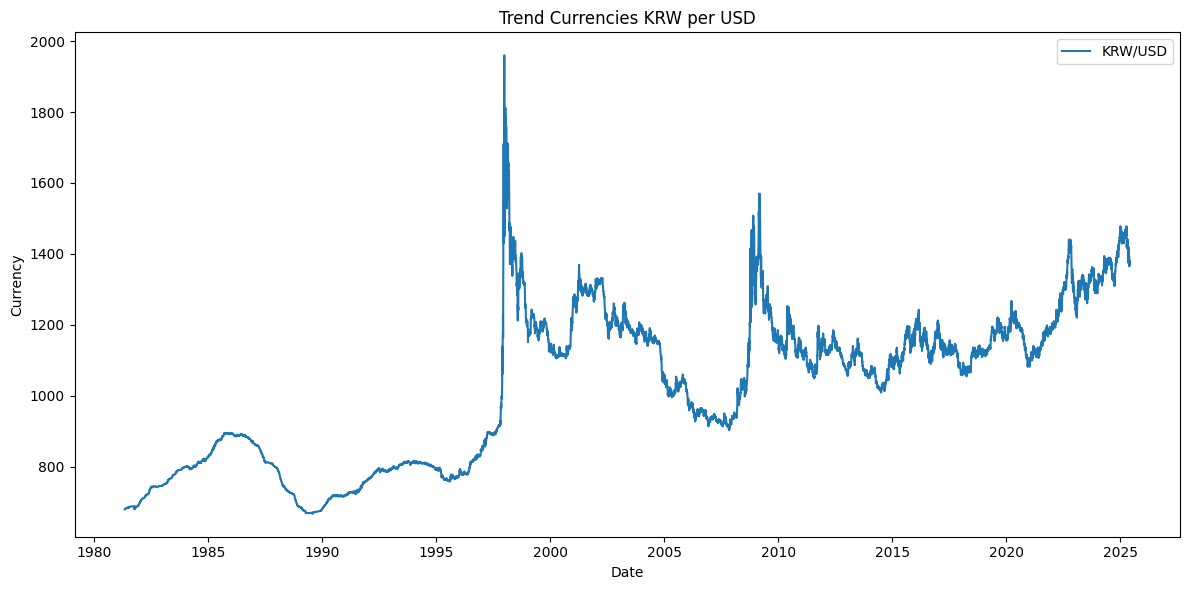

In [9]:
plt.figure(figsize=(12, 6))
plt.title("Trend Currencies KRW per USD")
plt.plot(df.index, df['KRW_per_USD'], label='KRW/USD')
plt.xlabel('Date')
plt.ylabel('Currency')
plt.legend()
plt.tight_layout()
plt.show()

### 환율의 흐름(롤링-rolling)확인하기

In [10]:
### 50일치에 대한 환율 흐름(이동 흐름) 확인하기
# - 전체년도 각각에 대한 50일치에 대한 이동평균과 이동표준편차 확인하기

### 50일 기간 설정
interval = 50

### 이동평균 계산
rolmean = df.rolling(interval).mean()

### 이동표준편차(rolling std) 계산
rolstd = df.rolling(interval).std()

rolmean, rolstd

(            KRW_per_USD
 Date                   
 1981-05-01          NaN
 1981-05-04          NaN
 1981-05-05          NaN
 1981-05-06          NaN
 1981-05-07          NaN
 ...                 ...
 2025-05-26    1428.3424
 2025-05-27    1426.8338
 2025-05-28    1425.0828
 2025-05-29    1423.1624
 2025-05-30    1421.4552
 
 [11501 rows x 1 columns],
             KRW_per_USD
 Date                   
 1981-05-01          NaN
 1981-05-04          NaN
 1981-05-05          NaN
 1981-05-06          NaN
 1981-05-07          NaN
 ...                 ...
 2025-05-26    33.036078
 2025-05-27    33.683177
 2025-05-28    34.083062
 2025-05-29    34.332971
 2025-05-30    34.256717
 
 [11501 rows x 1 columns])

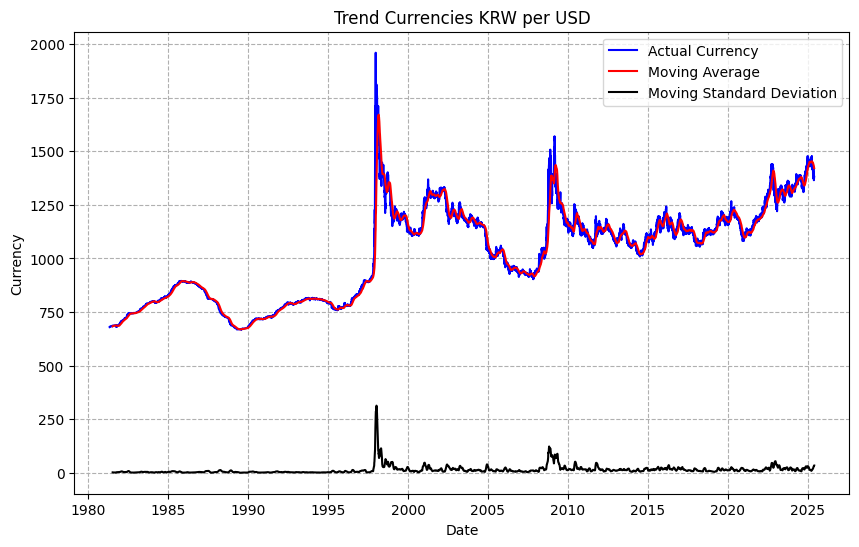

In [11]:
### 그래프로 시각화 하기
plt.figure(figsize=(10, 6))
plt.title('Trend Currencies KRW per USD')

### 실제 주식 가격
plt.plot(df, c='blue', label='Actual Currency')

### 이동 평균 그리기
plt.plot(rolmean, c='red', label='Moving Average')

### 이동 표준 편차 그리기
plt.plot(rolstd, c='black', label='Moving Standard Deviation')

plt.xlabel('Date')
plt.ylabel('Currency')

plt.legend()
plt.grid(linestyle='--')
plt.show()

### 데이터 스케일링 전처리

In [12]:
### 환율 데이터 확인하기
df.values

array([[ 679.6 ],
       [ 679.6 ],
       [ 679.6 ],
       ...,
       [1374.6 ],
       [1371.75],
       [1381.13]])

In [ ]:
### ADF 테스트에 사용할 데이터: 환율 데이터, 인덱스 Date 날짜
result = adfuller(df.values)
result


# (-2.463,          # test statistic (검정통계량)
#  0.1247,          # p-value (유의확률)
#  38,              # usedlag (사용된 시차)
#  11462,           # nobs (표본수)
#  {'1%': -3.431,   # 임계값(critical values) 1%
#   '5%': -2.862,   # 임계값 5%
#   '10%': -2.567}, # 임계값 10%
#  80920.98)        # 정보 기준 (AIC 등)


"""
(해석)
검정통계량 (-2.463) > 5% 임계값 (-2.862) → 통계량이 충분히 작지 않음
p-value (0.1247) > 0.05 → 귀무가설 기각할 근거 부족
즉, **귀무가설(비정상 시계열)이 기각되지 않아 이 환율 데이터는 정상성을 만족하지 못한다 (비정상 시계열)**고 판단합니다.
"""

(-2.4630375294664137,
 0.1247286117847789,
 38,
 11462,
 {'1%': -3.43092064780108,
  '5%': -2.861792195925606,
  '10%': -2.5669042387952077},
 80920.98112678425)

In [14]:
dff1 = df.diff()
dff1

,KRW_per_USD
Date,
1981-05-01,NaN
1981-05-04,0.00
1981-05-05,0.00
1981-05-06,0.50
1981-05-07,0.00
...,...
2025-05-26,5.41
2025-05-27,5.41
2025-05-28,-1.25


In [15]:
### NaN 데이터 모두 제거하기
dff1 = df.diff().dropna()
dff1

,KRW_per_USD
Date,
1981-05-04,0.00
1981-05-05,0.00
1981-05-06,0.50
1981-05-07,0.00
1981-05-08,0.30
...,...
2025-05-26,5.41
2025-05-27,5.41
2025-05-28,-1.25


<Axes: xlabel='Date'>

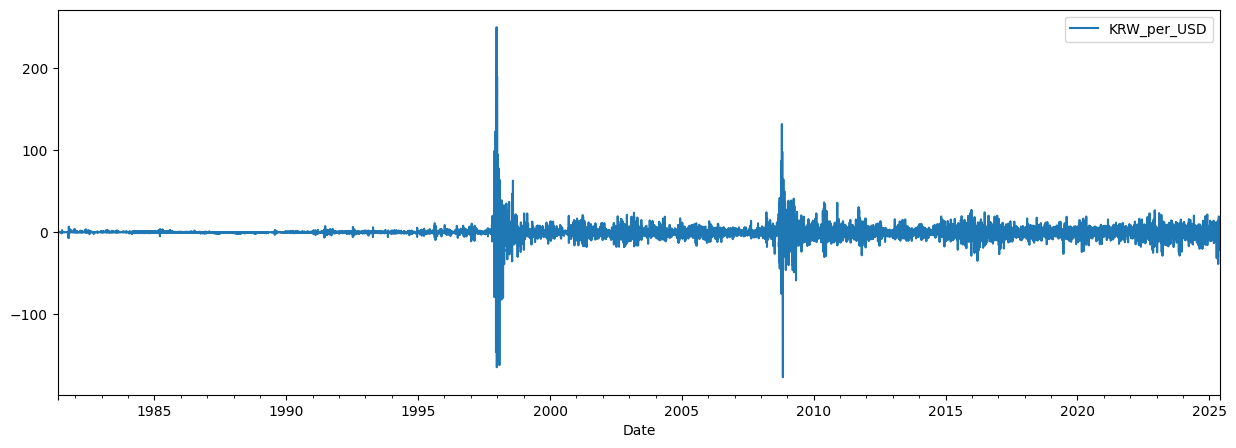

In [17]:
### 1차분 결과 데이터를 시각화 하기
dff1.plot(figsize=(15, 5))

In [18]:
### 1차분 계산 결과 데이터를 이용하여 -> 다시 한번 ADF 테스트를 통해 정상성 여부 확인하기
result = adfuller(dff1.values)
print(result)

print(f"p-value < 0.05: {result[1]:.3f} < 0.05")


# (-14.889,              # test statistic (검정통계량)
#  1.57e-27,             # p-value (거의 0에 가까움)
#  40,                   # 사용된 시차
#  11459,                # 표본수
#  {'1%': -3.431,        # 임계값 1%
#   '5%': -2.862,        # 임계값 5%
#   '10%': -2.567},      # 임계값 10%
#  80917.56)             # 정보 기준


"""
(해석)
1차 차분한 시계열은 정상(stationary) 시계열임이 통계적으로 입증
p-value < 0.05 이므로 귀무가설 기각
"""

(-14.88935270738887, 1.5658463209409832e-27, 40, 11459, {'1%': -3.430920797231844, '5%': -2.8617922619596965, '10%': -2.5669042739449193}, 80917.56056152662)
p-value < 0.05: 0.000 < 0.05


'\n(해석)\n1차 차분한 시계열은 정상(stationary) 시계열임이 통계적으로 입증\np-value < 0.05 이므로 귀무가설 기각\n'

### ARIMA 모델 훈련을 위한 하이퍼파라미터 찾기

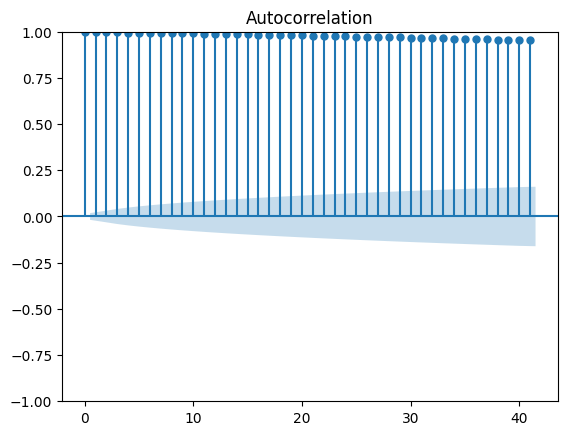

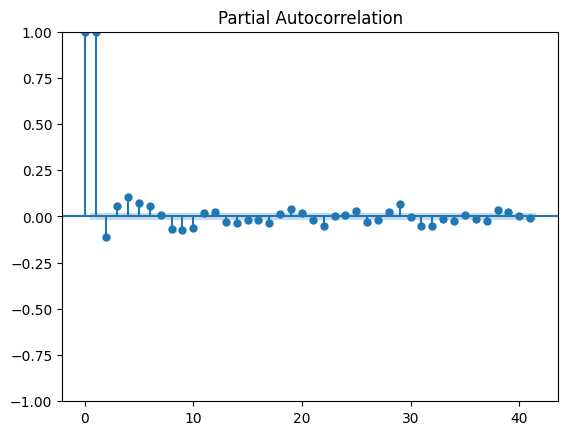

In [19]:
### 환율 원본을 이용하여 ACF 및 PACF 시각화하기
plot_acf(df)
plot_pacf(df)
plt.show()

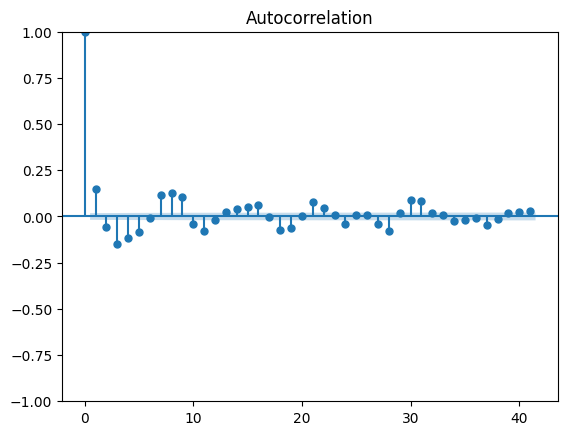

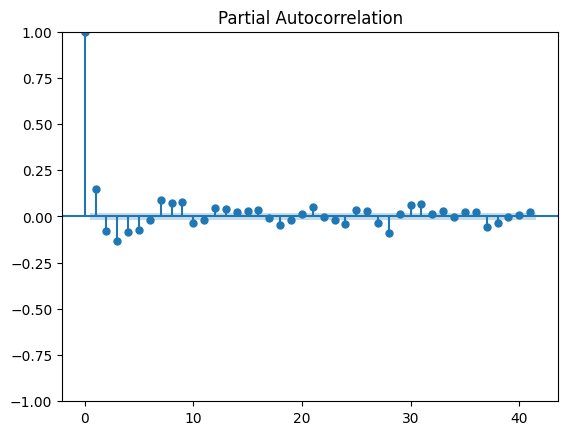

In [20]:
### 환율 1차분 계산된 정상성 데이터로 ACF 및 PACF 시각화하기
# - 환율 1차분 데이터: dff1
plot_acf(dff1)
plot_pacf(dff1)
plt.show()

### 1차분 데이터를 이용하 ACR(q) 지표와 PACF(p) 지표는
# - 0번째를 제외한 1번째가 벗어 났기에
# - p=1, d=1, q=1로 하이퍼파라미터를 정의할 수 있음
# 원본 데이터(0차분)부터 p-value가 거의 0이라서 이미 정상 시계열
# 즉, 차분을 추가로 할 필요가 없어보임

### 방법2

In [21]:
### 결정된 차분 차수의 'd값'은 -> auto_arima 수행 시 사용됩니다.
n_diffs=ndiffs(df, alpha=0.05, test='adf', max_d=6)
print(f"결정된 차분(d)의 차수: {n_diffs}d")

결정된 차분(d)의 차수: 0d


In [ ]:
### auto_arima 함수 사용: 최적의 p, q를 찾아서 최적의 모델을 반환해 줍니다.
model1 = pm.auto_arima(
    # 종속변수: 데이터 원본(환율)
    y = df ,
    
    # 차분의 차수
    d = 0,
    
    # p(AR)를 찾기 위한 범위를 지정
    start_p = 0, max_p = 5,
    
    # q(MA)를 찾기 위한 범위를 지정
    start_q = 0, max_q = 5,
    
    # m: 계절적(seasonal) 특성에 따라 사용되는 값(기본값은 1)
    m = 1,
    
    # seasonal: 계절성 특성 여부 설정(기본값은 False)
    seasonal = False,
    
    # stepwise: 최적의 모수를 찾기 위한 알고리즘을 사용할지 여부(기본값은 True)
    stepwise = True,
    
    # 자동 모형 선택 과정을 추력을 보여 줄지 여부 설정(기본값은 False)
    trace = True
)

"""
(해석)
차분 없이(d=0) 정상성을 만족했으므로, 원시 데이터 그대로 사용함.
AR(1)과 MA(5)가 포함된 ARIMA(1,0,5) 모델이 AIC 기준 가장 적합함.
절편을 포함한 모델이 더 적합한 것으로 판단됨.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192572.064, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.49 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=82214.460, Time=1.81 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=82214.922, Time=2.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=82211.879, Time=2.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=3.61 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.62 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=82007.459, Time=2.99 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=149200.666, Time=5.47 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=3.74 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=81944.370, Time=3.96 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=9.15 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=82009.428, Time=4.35 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=81931.901, 

In [ ]:
model1.summary()


"""
(해석)
AIC = 81929.488	낮은 AIC → 모델의 적합도는 상당히 좋음
BIC = 81988.289	BIC도 준수 (모델 복잡도까지 고려한 지표)
Log Likelihood = -40956.744	로그우도 역시 나쁘지 않음
모델계수 (ar, ma, intercept 등)	모두 유의확률 p-value < 0.05 → 통계적으로 유의함

Ljung-Box (Q)	            Prob(Q) = 0.99          잔차에 자기상관이 없다 → 잔차가 무작위적임 (좋음)
Jarque-Bera (JB)	        Prob(JB) = 0.00         잔차의 정규성이 깨졌음 (왜도+첨도 매우 큼)
Skew (왜도)	                1.67	                오른쪽으로 긴 꼬리 → 비대칭 분포
Kurtosis (첨도)	            142.51	                극단적인 값 존재 (정규분포보다 훨씬 뾰족)
Heteroskedasticity (H)	    Prob(H) = 0.00          등분산성 위반 (잔차의 분산이 일정하지 않음)
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11501
Model:               SARIMAX(1, 0, 5)   Log Likelihood              -40956.744
Date:                Tue, 17 Jun 2025   AIC                          81929.488
Time:                        16:08:36   BIC                          81988.289
Sample:                    05-01-1981   HQIC                         81949.254
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6870      0.233      2.952      0.003       0.231       1.143
ar.L1          0.9993      0.000   4995.712      0.000       0.999       1.000
ma.L1          0.1385      0.001    100.993      0.000       0.136       0.141
ma.L2         -0.0462      0.001    -31.015      0.000      -0.049      -0.043
ma.L3         -0.1268      0.002    -70.622      0.000      -0.130      -0.123
ma.L4         -0.0695      0.002    -45.178      0.000      -0.072      -0.066
ma.L5         -0.0366      0.001    -25.667      0.000      -0.039      -0.034
sigma2        72.4835      0.135    536.473      0.000      72.219      72.748
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           9331609.59
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              41.32   Skew:                             1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       142.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

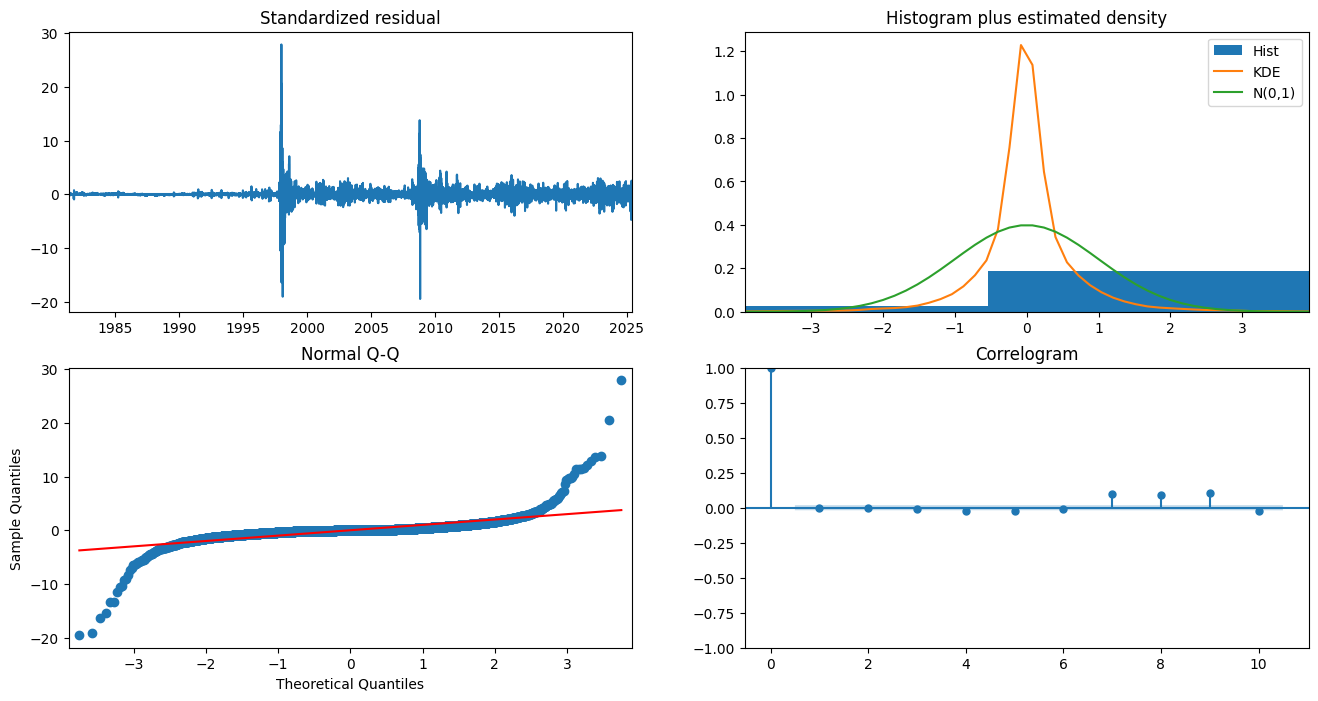

In [24]:
### 모델 시각화
model1.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
model2 = pm.auto_arima(
    y=df,                      # 시계열 데이터(종속 변수) 입력, 여기서는 환율 데이터프레임 또는 시리즈
    d=None,                    # 차분 차수를 자동으로 결정하게 함 (None이면 내부에서 ndiffs 테스트로 결정)
    start_p=0,                 # AR(자기회귀) 모수(p)의 시작값 (0부터 탐색 시작)
    max_p=5,                   # AR 모수(p)의 최대값 (최대 5까지 탐색)
    start_q=0,                 # MA(이동평균) 모수(q)의 시작값 (0부터 탐색 시작)
    max_q=5,                   # MA 모수(q)의 최대값 (최대 5까지 탐색)
    m=1,                       # 계절성 주기 설정 (1이면 계절성 없음, 예: 월간 데이터면 12)
    seasonal=False,            # 계절성 ARIMA 여부 (True면 계절모델, False면 일반 ARIMA)
    stepwise=True,             # 단계별 탐색 알고리즘 사용 여부 (True면 빠른 탐색, False면 완전 탐색)
    trace=True,                # 탐색 과정 중 중간 결과 및 후보 모델의 AIC 등 로그 출력 여부
    information_criterion='aic'  # 모델 선택 기준 (AIC - Akaike 정보 기준, BIC도 선택 가능)
)


"""
(해석)
- 1차 차분(d=1)을 적용해야 정상성을 만족했음
- AIC 기준으로 볼 때, ARIMA(5,1,2) 모델이 가장 적합한 것으로 판단됨
- 이 모델은 5개의 자기회귀(AR) 항과 2개의 이동평균(MA) 항을 포함하고 있음
- 모델에는 절편(intercept)도 포함되어 있으며, 이는 데이터에 일정한 평균 이동이 있음을 시사함
- 따라서 예측 모델로 ARIMA(5,1,2) 모델을 사용하는 것이 최선
"""

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82476.765, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=82224.491, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=82197.470, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82475.327, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=82197.918, Time=1.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=82194.850, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=82052.483, Time=3.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=81703.901, Time=2.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=81946.751, Time=2.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=81697.858, Time=4.82 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=81856.261, Time=3.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=81672.072, Time=6.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=81842.745, Time=3.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=81622.479, Time=9.14 sec
 ARIMA(5,1,1)(0,0,0

In [ ]:
model2.summary()


"""
(해석)
모델 적합도는 아주 좋음 (AIC 낮고 AR/MA 계수 모두 유의).
그러나:
잔차가 정규분포를 따르지 않음 → 예측 신뢰 구간 부정확할 수 있음.
이분산성 존재 (이상치, 변동성 클러스터링) → GARCH 모델 고려 필요

(결론)
이 ARIMA(5,1,2) 모델은 평균 수준을 예측하기에 적합하지만,
잔차가 시간에 따라 달라지는(비정상적 분산) 특징을 보이므로,
변동성 예측까지 고려한다면 다른 모형(GARCH 등) 고려
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11501
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -40802.639
Date:                Tue, 17 Jun 2025   AIC                          81621.279
Time:                        16:14:51   BIC                          81680.080
Sample:                    05-01-1981   HQIC                         81641.045
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0820      0.006    186.958      0.000       1.071       1.093
ar.L2         -0.9592      0.006   -162.400      0.000      -0.971      -0.948
ar.L3          0.0503      0.003     14.859      0.000       0.044       0.057
ar.L4         -0.0109      0.003     -3.781      0.000      -0.017      -0.005
ar.L5         -0.1017      0.002    -44.119      0.000      -0.106      -0.097
ma.L1         -0.9608      0.006   -174.082      0.000      -0.972      -0.950
ma.L2          0.7757      0.005    157.490      0.000       0.766       0.785
sigma2        70.6830      0.140    503.204      0.000      70.408      70.958
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           8141072.88
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              44.53   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                       133.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

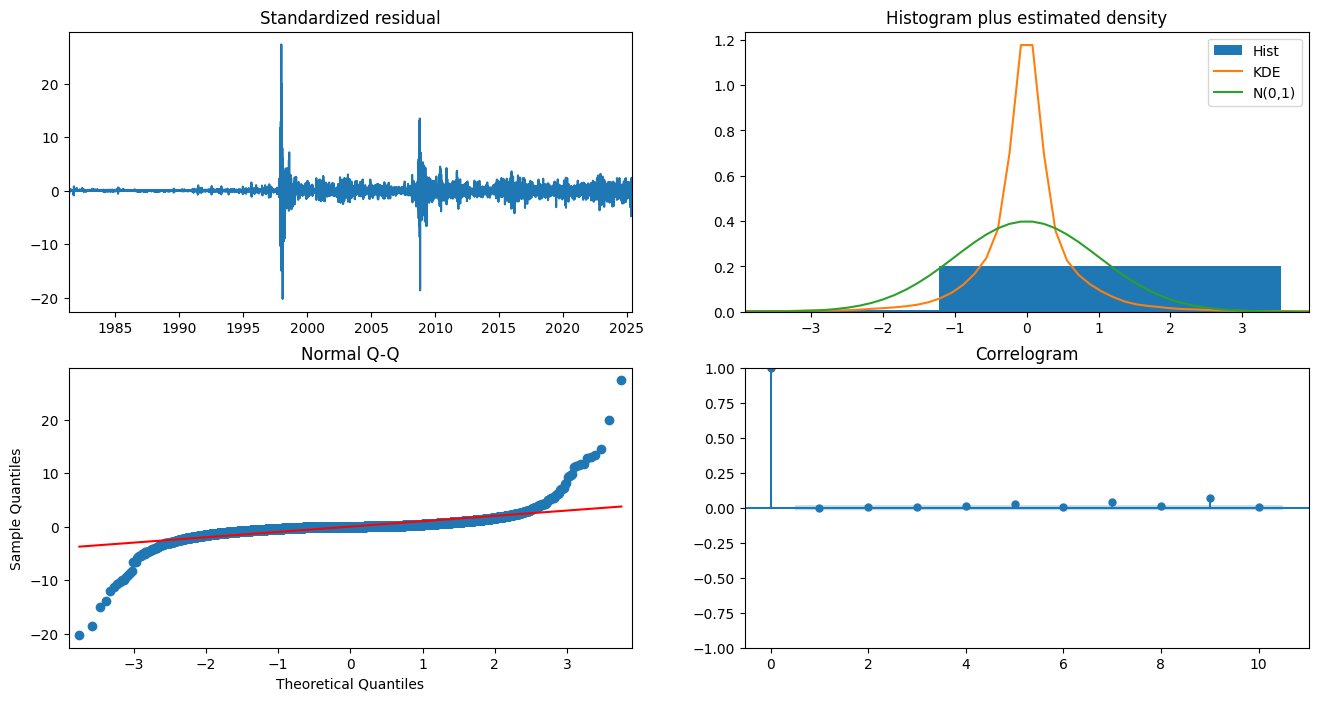

In [27]:
### 모델 시각화
model2.plot_diagnostics(figsize=(16,8))
plt.show()

### GARCH로 해보기

In [32]:
# df는 환율 데이터(종속변수)로 구성된 시계열 pandas Series라고 가정
# 예: df = pd.Series([환율 시계열 데이터])
series = df['KRW_per_USD']  # 첫 번째 컬럼을 시리즈로 뽑기

In [ ]:
from arch import arch_model  # arch 패키지에서 GARCH 모델링을 위한 함수 불러오기

# GARCH(1,1) 모델 생성
# vol='Garch' : 변동성 모형으로 GARCH 사용 지정
# p=1 : ARCH 항의 차수 (과거 오차 제곱항 개수)
# q=1 : GARCH 항의 차수 (과거 조건부 분산항 개수)
# rescale=True : 입력 데이터를 내부적으로 표준화하여 안정적인 추정 지원
model_garch = arch_model(series, vol='Garch', p=1, q=1, rescale=True)

# 모델 적합(fitting) 수행
# disp='on' : 학습 과정 출력 켜기 (수렴 상태 등 정보를 콘솔에 표시)
result = model_garch.fit(disp="on")

# 적합 결과 요약 출력
# 회귀 계수, 모수 추정치, 통계량 등이 포함되어 있음
print(result.summary())



"""
(주요 출력 항목)
mu	    
- 평균 모델의 상수항 (평균값)
- 112.6141 (유의미, p-value 0.000) 
- 환율의 평균 수준이 약 112.6임을 의미

omega	
- GARCH 모형의 상수항 (기본 분산 수준)
- 0.2268, p-value 매우 낮음 
- 기본 변동성 수준이 존재함을 의미

alpha[1]
- ARCH 항 계수 (과거 오차의 영향)
- 0.8493, p-value 매우 낮음 
- 과거 충격(오차 제곱)이 현재 변동성에 매우 큰 영향

beta[1]	
- GARCH 항 계수 (과거 변동성의 영향)
- 0.1487, p-value 0.0169 (유의미)
- 과거 변동성도 현재 변동성에 영향이 있으나 ARCH 항보다는 작음

(의미 요약)
alpha[1] + beta[1] = 0.8493 + 0.1487 = 0.998
이 합이 1에 아주 가까워서 변동성이 매우 오래 지속됨(long memory, persistence)을 나타냅니다.
즉, 큰 변동성(예: 환율 변동 폭)이 한 번 발생하면 이후에도 오랫동안 높은 변동성이 유지됨을 뜻합니다.

평균 mu가 약 112.6이므로, 시계열(환율)은 평균적으로 이 값 근처에서 움직이고 있다는 뜻입니다.

모수들은 모두 통계적으로 매우 유의미해서 신뢰할 수 있는 모델입니다.

(기타 지표)
Log-Likelihood: -44268.9
최대우도값으로 모델 적합도 평가에 활용

AIC, BIC 값
다른 모델들과 비교해서 더 낮으면 더 좋은 모델임을 나타냄

요약
이 환율 시계열은 GARCH(1,1) 모형으로 잘 설명되며, 변동성은 과거 충격에 매우 민감하고 오래 지속되는 패턴을 가집니다. 
평균 환율은 약 112.6 수준이며, 모델의 모든 주요 파라미터는 통계적으로 유의미합니다.
"""

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2135382216378.142
Iteration:      2,   Func. Count:     12,   Neg. LLF: 58894.44093601761
Iteration:      3,   Func. Count:     18,   Neg. LLF: 92744.2121418921
Iteration:      4,   Func. Count:     28,   Neg. LLF: 55792.82744747329
Iteration:      5,   Func. Count:     34,   Neg. LLF: 60767.751822673665
Iteration:      6,   Func. Count:     41,   Neg. LLF: 57017.141750025105
Iteration:      7,   Func. Count:     47,   Neg. LLF: 46416.94764909502
Iteration:      8,   Func. Count:     53,   Neg. LLF: 45613.94293350131
Iteration:      9,   Func. Count:     59,   Neg. LLF: 44371.282641608355
Iteration:     10,   Func. Count:     64,   Neg. LLF: 45107.620680610475
Iteration:     11,   Func. Count:     71,   Neg. LLF: 516859.2903560013
Iteration:     12,   Func. Count:     78,   Neg. LLF: 44305.814659572556
Iteration:     13,   Func. Count:     83,   Neg. LLF: 44295.75810630754
Iteration:     14,   Func. Count:     89,   Neg. LLF: 44270.

### ARIMA(또는 SARIMA) + GARCH

In [ ]:
# auto_arima 함수로 최적 ARIMA 모수(p,d,q)를 자동 탐색 및 모델 적합
a_arima = pm.auto_arima(
    y = df,               # 시계열 데이터 (환율 등)
    d = None,             # 차분 차수를 자동으로 결정하도록 설정 (None)
    start_p = 0, max_p = 5,  # AR 차수 탐색 범위 (0부터 5까지)
    start_q = 0, max_q = 5,  # MA 차수 탐색 범위 (0부터 5까지)
    m = 1,                # 계절성 주기 설정 (1이면 비계절성)
    seasonal = False,     # 계절성 모형 여부 (False면 계절성 모형 미사용)
    stepwise = True,      # stepwise 탐색 알고리즘 사용으로 빠른 탐색 수행
    trace = True          # 탐색 과정을 출력하여 진행상황 확인 가능
)

# 탐색된 최적 ARIMA 모델 요약 결과 출력 (모수, AIC, BIC 등)
print(a_arima.summary())

# 최적 ARIMA 모델 적합 후 잔차(residuals) 추출
# 잔차는 실제 데이터와 ARIMA 모델 예측값 차이 (시계열의 '오차' 부분)
residuals = pd.Series(a_arima.resid())

# 잔차 시계열에 대해 GARCH(1,1) 모델 적합 수행
# GARCH 모델은 잔차의 조건부 분산(변동성 clustering)을 모델링함
model_garch = arch_model(
    residuals,            # ARIMA 잔차를 입력 데이터로 사용
    vol='Garch',          # GARCH 모델 지정 (변동성 모델)
    p=1,                  # ARCH 항 차수 (과거 잔차 제곱항 개수)
    q=1,                  # GARCH 항 차수 (과거 조건부 분산항 개수)
    rescale=True          # 입력 데이터 내부 표준화로 안정적 추정 지원
)

# GARCH 모델 적합 실행, disp='on'으로 학습 진행 출력 활성화
result_garch = model_garch.fit(disp='on')

# GARCH 모델 적합 결과 요약 출력
print(result_garch.summary())


"""
======================= ARIMA(5,1,2) 모델 결과 =======================
최적 모형: ARIMA(5,1,2)
→ AR 차수(p)=5, 차분 차수(d)=1, MA 차수(q)=2로 설정된 모델이 AIC 기준 가장 좋음

AIC = 81621.279
→ AIC는 정보 기준으로, 값이 낮을수록 좋은 모델입니다.

계수(coef) 해석:

ar.L1부터 ar.L5: 자기회귀(AR) 계수
예: ar.L1=1.0820 의미는 1 시점 전 값이 현재 값에 약 1.08배 영향

ma.L1, ma.L2: 이동평균(MA) 계수

모든 계수 p-value가 0.000으로 매우 유의미함 (통계적으로 의미 있는 변수)

차분(d=1):
→ 시계열을 1번 차분해 정상성(평균과 분산이 일정한 상태)을 만들었다는 뜻

잔차 통계:

Ljung-Box(Q) 검정: p=0.92 (잔차에 자기상관 없음, 모형 적합 양호)

Jarque-Bera 검정: p=0.00 (잔차 정규성 가정 위배 가능성 있음)

Heteroskedasticity (이분산성): p=0.00 (잔차 분산이 일정하지 않음 → 변동성 모형 필요성 시사)

Skew(왜도)=1.79, Kurtosis(첨도)=133.3 (잔차 분포가 정규분포와 크게 다름)

======================= GARCH(1,1) 모델 결과 (잔차 변동성 모델링) =======================
모델: Constant Mean - GARCH(1,1)
→ 평균 모델은 상수, 분산 모델로 GARCH(1,1) 사용

Log-Likelihood = -29113.1, AIC = 58234.1, BIC = 58263.5

평균 모델 계수 (mu): 0.006, p=0.684 (유의미하지 않음, 의미 없는 평균 변화)

변동성 모델 계수:

omega (상수항): 0.0118, p=0.0005 (유의미)

alpha[1] (ARCH term): 0.1013, p=0.000 (과거 잔차 제곱의 영향)

beta[1] (GARCH term): 0.8987, p=0.000 (과거 조건부 분산의 영향)

해석:

alpha + beta ≈ 1 (0.1013 + 0.8987 = 1.0에 근접)
→ 변동성이 시간에 따라 오래 지속됨(long memory 특성)
→ 변동성 클러스터링 현상이 강하게 존재함

======================= 요약 =======================
ARIMA(5,1,2) 모델이 시계열 평균 패턴을 잘 설명함

잔차의 분산이 일정하지 않아 GARCH(1,1) 모델로 변동성(분산)의 동적 변화를 잘 잡아냄

잔차가 정규분포를 따르지 않고 변동성 클러스터링이 강하므로, GARCH 적용이 적절함

이 두 모델을 결합해 시계열 평균과 변동성을 효과적으로 분석할 수 있음
"""

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82476.765, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=82224.491, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=82197.470, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82475.327, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=82197.918, Time=1.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=82194.850, Time=1.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=82052.483, Time=3.90 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=81703.901, Time=2.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=81946.751, Time=2.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=81697.858, Time=4.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=81856.261, Time=3.04 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=81672.072, Time=6.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=81842.745, Time=3.24 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=81622.479, Time=9.53 sec
 ARIMA(5,1,1)(0,0,0

### 훈련 및 테스트 데이터로 분리하여 훈련 및 테스트하기

In [36]:
index_split = int(len(df)*0.8)
train_data = df[:index_split]
test_data = df[index_split:]

print(train_data.shape, test_data.shape)

(9200, 1) (2301, 1)


In [37]:
### 훈련데이터로 훈련 시키기(계절성 미적용)
# 변수명: best_model_sFalse
best_model_sFalse = pm.auto_arima(
    y = train_data,
    d = 1,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    m=0,
    seasonal=False,
    stepwise=True,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=66976.035, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66723.565, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=66694.004, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=66974.274, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=66695.050, Time=1.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=66693.208, Time=1.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=66564.539, Time=2.80 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=66237.665, Time=3.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=66454.077, Time=2.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=66231.234, Time=3.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=66372.926, Time=2.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=66207.132, Time=4.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=66358.418, Time=2.87 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=66165.431, Time=6.37 sec
 ARIMA(5,1,1)(0,0,0

In [38]:
### 훈련데이터로 훈련 시키기(계절성 적용)
# 변수명: best_model_sTrue
best_model_sTrue = pm.auto_arima(
    y=train_data,
    d=None,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    m=7,  # 주 7일 주기 고려
    seasonal=True,
    stepwise=True,
    trace=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=66811.553, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=66976.035, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=66608.864, Time=1.59 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=66584.712, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=66974.274, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=66694.004, Time=0.72 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=66568.300, Time=2.55 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=66579.437, Time=1.29 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=66570.239, Time=6.43 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=66570.191, Time=5.87 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=66582.736, Time=2.66 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=66574.724, Time=2.87 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=66541.989, Time=8.22 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=66781.938, Time=5.52 sec
 ARIMA(1,1,1)(2,0,2

In [ ]:
### 계절성 미적용: 검정(평가) 함수: summary()
best_model_sFalse.summary()

"""
(해석)
비계절성 ARIMA(5,1,2) 모델 결과 해석
 - 모델 선정: ARIMA(5,1,2) 최적 모델로 선택됨
 - AIC: 66163.778 (낮을수록 좋은 적합도 의미)
 - 잔차 자기상관: Ljung-Box Q-test p=0.94 → 잔차에 자기상관 없음 → 모델이 데이터 평균적인 패턴 잘 잡음
 - 분산 동질성 검정(Heteroskedasticity): H = 134.51, p=0.00 → 잔차 분산 일정하지 않음(변동성 클러스터링 존재)

(요약)
평균(레벨) 변화는 잘 설명했으나
변동성(잔차 분산) 변화는 설명 못 함 → GARCH 모델 필요
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9200
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -33073.889
Date:                Tue, 17 Jun 2025   AIC                          66163.778
Time:                        16:51:21   BIC                          66220.793
Sample:                    05-01-1981   HQIC                         66183.157
                         - 08-04-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0940      0.006    176.784      0.000       1.082       1.106
ar.L2         -0.9775      0.006   -153.957      0.000      -0.990      -0.965
ar.L3          0.0625      0.004     16.419      0.000       0.055       0.070
ar.L4         -0.0153      0.003     -4.726      0.000      -0.022      -0.009
ar.L5         -0.1061      0.003    -41.453      0.000      -0.111      -0.101
ma.L1         -0.9587      0.006   -162.717      0.000      -0.970      -0.947
ma.L2          0.7728      0.005    148.096      0.000       0.763       0.783
sigma2        77.7002      0.170    457.635      0.000      77.367      78.033
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           6675275.13
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             134.51   Skew:                             1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                       134.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
### 계절성 적용: 검정(평가) 함수: summary()
best_model_sTrue.summary()

"""
(해석)
 - 계절성 SARIMAX(5,1,2)(1,0,2)[7] 모델 결과 해석
 - 최적 모델: SARIMAX(5,1,2)(1,0,2)[7] + intercept
 - AIC: 66143.360 (비계절성 모델 대비 약간 더 낮아 모델 적합도 개선)
 - 로그가능도 (Log Likelihood): -33059.680
 - 잔차 자기상관 검사 (Ljung-Box Q-test): p=0.91 → 잔차에 자기상관 없음 → 패턴 잘 설명
 - 잔차 분포 왜곡 및 첨도: 왜도(Skew) 1.82, 첨도(Kurtosis) 130.27 → 잔차가 정규분포에서 벗어나 있음 (꼬리가 두꺼움)
 - 분산 동질성 (Heteroskedasticity) 검정: H=134.60, p=0.00 → 잔차 분산이 일정하지 않음(변동성 클러스터링 존재)

(계절항 계수)
 - ar.S.L7 (계절 AR 1주기) = 0.9089 (유의미)
 - ma.S.L7 (계절 MA 1주기) = -0.8551 (유의미)
 - ma.S.L14 (계절 MA 2주기) = -0.0612 (유의미)
 - 평균(Intercept): 0.0043, p=0.613 → 유의하지 않음 (평균변화 거의 없음)

(요약)
 -계절성을 반영해 예측 성능이 개선됨
 - 잔차 자기상관 문제는 없음
 - 변동성 클러스터링 문제 여전히 존재 → GARCH 모델 적용 고려 필요
 - 잔차 분포가 정규분포를 따르지 않음 → 이상치 혹은 극단값 영향 존재 가능
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 9200
Model:             SARIMAX(5, 1, 2)x(1, 0, 2, 7)   Log Likelihood              -33059.680
Date:                           Tue, 17 Jun 2025   AIC                          66143.360
Time:                                   16:51:23   BIC                          66228.882
Sample:                               05-01-1981   HQIC                         66172.429
                                    - 08-04-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0043      0.009      0.506      0.613      -0.012       0.021
ar.L1          1.1057      0.007    155.934      0.000       1.092       1.120
ar.L2         -1.0143      0.008   -132.158      0.000      -1.029      -0.999
ar.L3          0.0692      0.004     17.271      0.000       0.061       0.077
ar.L4         -0.0006      0.003     -0.162      0.871      -0.007       0.006
ar.L5         -0.1210      0.003    -44.552      0.000      -0.126      -0.116
ma.L1         -0.9691      0.007   -145.226      0.000      -0.982      -0.956
ma.L2          0.8060      0.007    123.346      0.000       0.793       0.819
ar.S.L7        0.9089      0.031     29.254      0.000       0.848       0.970
ma.S.L7       -0.8551      0.031    -27.437      0.000      -0.916      -0.794
ma.S.L14      -0.0612      0.003    -23.293      0.000      -0.066      -0.056
sigma2        77.3826      0.196    395.488      0.000      76.999      77.766
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           6213151.78
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):             134.60   Skew:                             1.82
Prob(H) (two-sided):                  0.00   Kurtosis:                       130.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

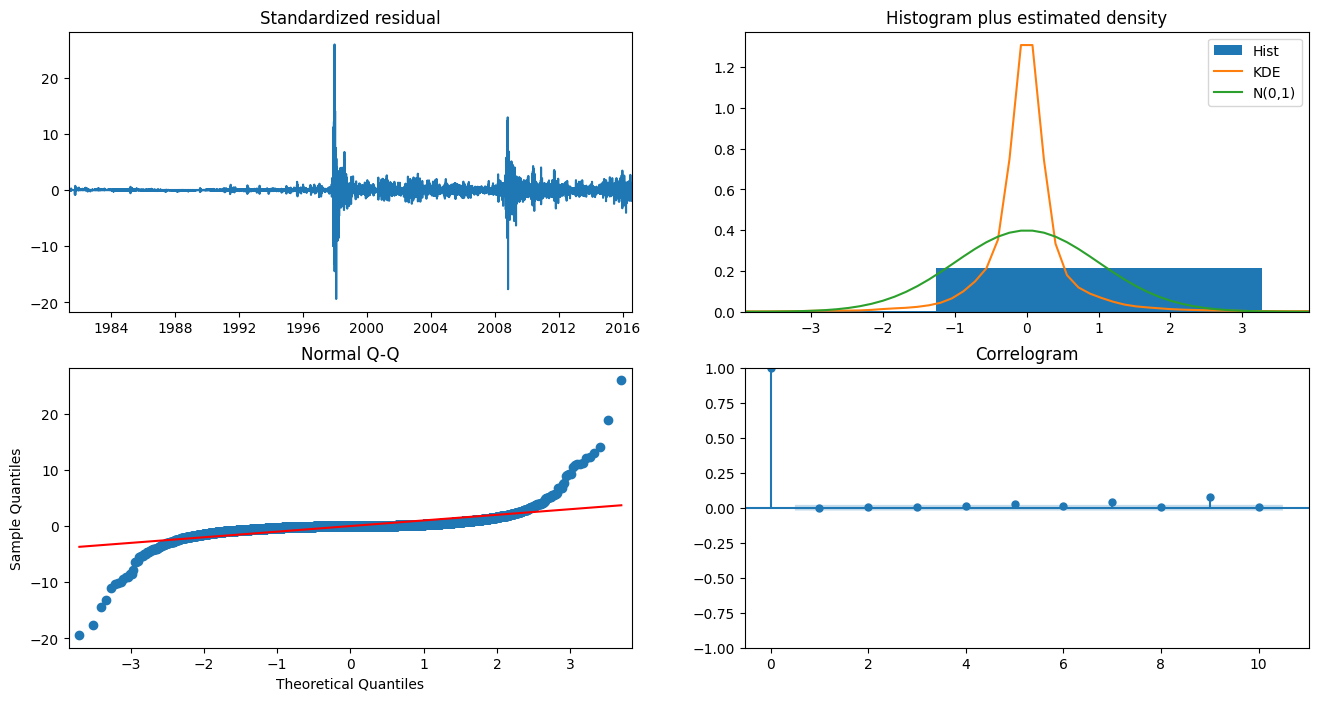

In [41]:
### 계절성 미적용: 검정(평가) 함수: plot.dignostics()
best_model_sFalse.plot_diagnostics(figsize=(16, 8))
plt.show()

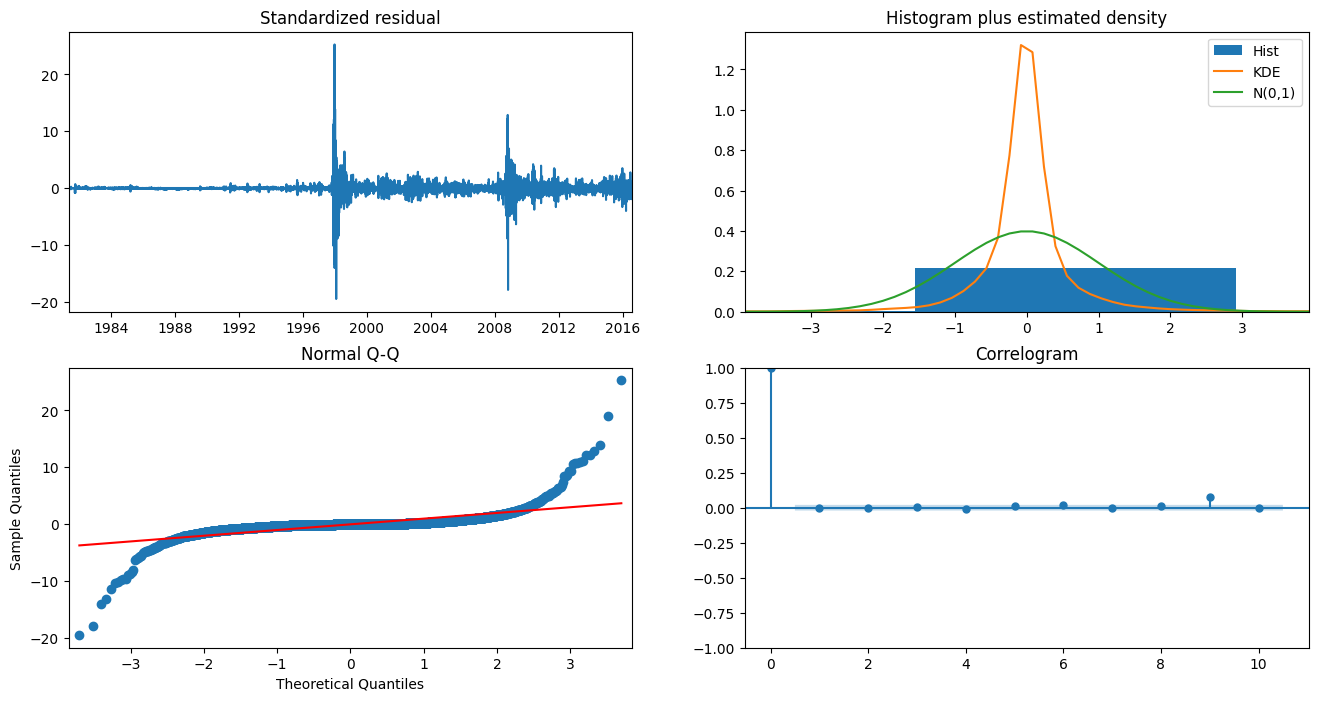

In [42]:
### 계절성 적용: 검정(평가) 함수: plot.dignostics()
best_model_sTrue.plot_diagnostics(figsize=(16, 8))
plt.show()

In [43]:
# best_model_sTrue 에서 파라미터 추출
order = best_model_sTrue.order
seasonal_order = best_model_sTrue.seasonal_order

order, seasonal_order

((5, 1, 2), (1, 0, 2, 7))

In [ ]:
# statsmodels SARIMAX 로 정확하게 학습

# statsmodels 라이브러리에서 SARIMAX 모델 불러오기
# SARIMAX는 계절성 및 외생변수 포함 가능한 ARIMA 확장 모델로,
# 시계열 모델링, 예측, 잔차 분석 등에 사용됨
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order).fit(disp=False)

c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
# 잔차 추출
residuals = sarimax_model.resid
residuals

Date
1981-05-01    679.600000
1981-05-04     -0.009501
1981-05-05      0.005278
1981-05-06      0.507824
1981-05-07     -0.078567
                 ...    
2016-07-29    -11.115300
2016-08-01     -6.447833
2016-08-02      0.237780
2016-08-03      4.918875
2016-08-04     -7.003461
Length: 9200, dtype: float64

In [ ]:
# GARCH 모델 학습
model_garch = arch_model(residuals, vol='Garch', p=1, q=1, dist='StudentsT', rescale=True)
result_garch = model_garch.fit(disp='off')
print(result_garch.summary())


"""
(해석)
 - GARCH(1,1) 모델이 잔차 변동성(이분산성)을 잘 설명하고 있음
 - ARCH(alpha)와 GARCH(beta) 모두 유의미하게 변동성에 영향 미침
 - t-분포를 사용해서 극단 변동성도 잘 처리함
 - omega는 유의하지 않아, 변동성 상수항은 거의 0 수준
"""


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -20703.4
Distribution:      Standardized Student's t   AIC:                           41416.7
Method:                  Maximum Likelihood   BIC:                           41452.4
                                              No. Observations:                 9200
Date:                      Tue, Jun 17 2025   Df Residuals:                     9199
Time:                              17:01:40   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

### 최종 훈련 모델 선정하기

##### ARIMA 적용 함수

In [57]:
### 1. n-step 예측 함수
# - model : 학습된 ARIMA 모델 (auto_arima 등)
# - n : 예측 기간 (일 단위, 기본 1일)
def forecast_n_step(model, n=1):
    """
    ARIMA 모델로 향후 n일 예측 수행 (신뢰구간 포함)
    """
    # n_periods : 예측 기간
    # return_conf_int : 신뢰구간 반환 여부
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    
    return (
        fc.tolist()[0:n],                # 예측값 리스트 반환
        np.asarray(conf_int).tolist()[0:n]  # 신뢰구간 리스트 반환 [[하한, 상한], ...]
    )


### 2. 예측 반복 수행 함수
def forecast(length, model, index, df=None):
    """
    향후 'length' 기간만큼의 시계열 예측을 수행합니다.

    Parameters
    ----------
    length : int
        예측할 기간 길이 (예: len(test_data))
    model : auto_arima로 학습된 모델 객체
        이미 훈련된 ARIMA 모델
    index : pd.DatetimeIndex 또는 pd.Index
        예측 결과에 사용할 인덱스 (예: 날짜)
    df : pd.Series 또는 pd.DataFrame, optional
        테스트용 실제 관측값이 있는 경우 사용

    Returns
    -------
    y_pred : pd.Series
        예측값 시계열
    pred_upper : list
        예측값의 신뢰구간 상한 리스트
    pred_lower : list
        예측값의 신뢰구간 하한 리스트
    """

    y_pred = []      # 예측값을 저장할 리스트
    pred_upper = []  # 신뢰구간 상한
    pred_lower = []  # 신뢰구간 하한

    if df is not None:
        # df가 DataFrame이면 첫 번째 열만 사용, Series면 그대로 사용
        if isinstance(df, pd.DataFrame):
            data_iter = df.iloc[:, 0]  # 첫 번째 열 (시계열 데이터)
        else:
            data_iter = df  # 이미 Series라면 그대로 사용

        # 테스트 데이터가 있는 경우 (예: 실제값으로 성능 평가 시)
        for new_data in data_iter:
            # 1일 예측 수행 (1-step forecast)
            fc, conf = forecast_n_step(model)

            # 예측값 및 신뢰구간 저장
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])  # 상한
            pred_lower.append(conf[0][0])  # 하한

            # 모델을 실제 관측값(new_data)으로 업데이트
            model.update(new_data)

    else:
        # 미래 예측 (실제 관측 데이터 없이 예측 시뮬레이션)
        for _ in range(length):
            fc, conf = forecast_n_step(model)

            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])

            # 예측된 값으로 모델 업데이트 (시뮬레이션용)
            model.update(fc[0])

    # 예측값을 Series로 반환 (인덱스와 함께)
    return pd.Series(y_pred, index=index), pred_upper, pred_lower



### 3. 함수 호출 예시
# - best_model_sTrue: auto_arima 등 학습된 모델 (계절성 적용된)
# - test_data: 테스트 시계열 데이터
# - test_data.index: 시계열 인덱스 (날짜 등)

fc, upper, lower = forecast(len(test_data), best_model_sTrue,
                             test_data.index, df=test_data)

# 결과 출력
print(fc.head())
print(upper[:5])
print(lower[:5])


Date
2016-08-05    1112.038705
2016-08-08    1114.288463
2016-08-09    1105.691994
2016-08-10    1099.141729
2016-08-11    1096.170097
dtype: float64
[1129.2799964282497, 1131.5305318266992, 1122.9362320048203, 1116.386192849521, 1113.4156673957236]
[1094.7974143441545, 1097.0463933154256, 1088.4477568318412, 1081.8972647534868, 1078.9245269303833]


In [58]:
### 신뢰구간 하한/상한을 Series로 변환 (시각화용)
lower_series = pd.Series(lower, index=test_data.index)
upper_series = pd.Series(upper, index=test_data.index)

# 예측값의 길이와 인덱스를 확인 (오류 방지용)
print("예측구간:", lower_series.shape, upper_series.shape)

예측구간: (2301,) (2301,)


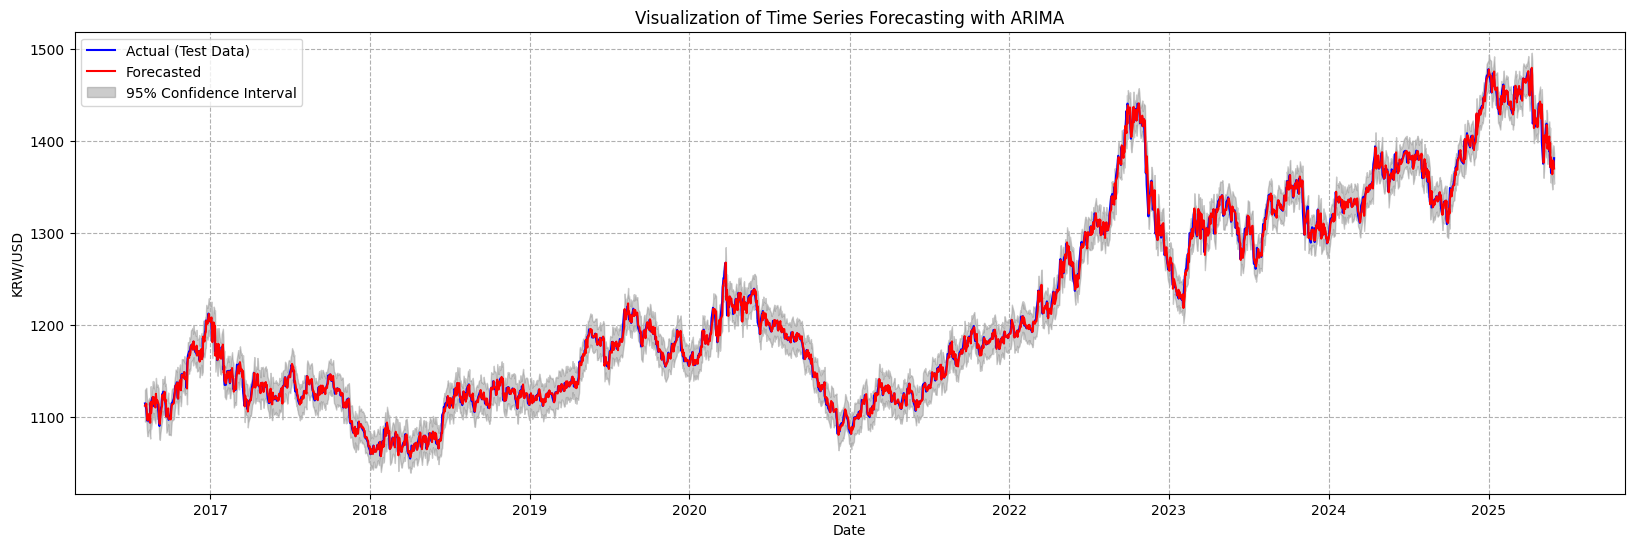

In [59]:
### 시계열 예측 결과 시각화
plt.figure(figsize=(20,6))
plt.title("Visualization of Time Series Forecasting with ARIMA")

# 실제 관측값 (테스트 구간)
plt.plot(test_data, label="Actual (Test Data)", c="blue")

# 예측값
plt.plot(fc, label="Forecasted", c="red")

# 신뢰구간 시각화 (상한~하한을 회색으로 채움)
plt.fill_between(
    lower_series.index,
    lower_series,
    upper_series,
    label="95% Confidence Interval",
    color="grey",
    alpha=0.4
)

plt.legend()
plt.grid(linestyle="--")
plt.xlabel("Date")
plt.ylabel("KRW/USD")
plt.show()

In [60]:
### 성능 지표 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data, fc)
mse = mean_squared_error(test_data, fc)
r2 = r2_score(test_data, fc)

print(f"평가 지표:")
print(f"MAE (평균 절대 오차): {mae:.3f}")
print(f"MSE (평균 제곱 오차): {mse:.3f}")
print(f"R² (결정계수): {r2:.3f}")


평가 지표:
MAE (평균 절대 오차): 4.814
MSE (평균 제곱 오차): 42.689
R² (결정계수): 0.996


##### arima+garch 적용 함수

In [61]:
import numpy as np
import pandas as pd

def arima_garch_forecast(arima_model, garch_model, steps, index=None, update_with_data=None):
    """
    ARIMA와 GARCH를 함께 활용한 다중 스텝 예측 함수
    
    Parameters:
    - arima_model : 이미 학습된 ARIMA 모델 (pmdarima 객체)
    - garch_model : 이미 학습된 GARCH 모델 (arch_model.fit() 결과)
    - steps : 예측할 미래 기간 (일 수)
    - index : 예측 결과 인덱스 (예: 날짜)
    - update_with_data : (Optional) ARIMA 모델 업데이트할 테스트 데이터 (리스트/시리즈)
    
    Returns:
    - pred_mean : ARIMA 평균 예측값 (pd.Series)
    - conf_int_lower : 하한 신뢰구간 (list)
    - conf_int_upper : 상한 신뢰구간 (list)
    """
    
    pred_mean = []
    conf_int_lower = []
    conf_int_upper = []
    
    # 테스트 데이터가 있으면, 한 스텝씩 예측하면서 ARIMA 모델 업데이트
    if update_with_data is not None:
        for y_true in update_with_data:
            # 1-step ARIMA 예측 및 신뢰구간
            fc, conf = arima_model.predict(n_periods=1, return_conf_int=True)
            pred_mean.append(fc[0])
            conf_int_lower.append(conf[0][0])
            conf_int_upper.append(conf[0][1])
            
            # ARIMA 모델에 실제 데이터 업데이트
            arima_model.update(y_true)
        
        # GARCH 변동성 예측 (이후 steps 만큼)
        garch_forecast = garch_model.forecast(horizon=steps)
        # conditional volatility (표준편차) 추출
        cond_vol = np.sqrt(garch_forecast.variance.values[-1, :])
        
        # ARIMA 예측 신뢰구간 재계산 (평균 ± 1.96 * 변동성)
        # - 기존 신뢰구간 대신 GARCH 변동성 반영한 신뢰구간으로 교체
        conf_int_lower = [m - 1.96 * v for m, v in zip(pred_mean[-steps:], cond_vol)]
        conf_int_upper = [m + 1.96 * v for m, v in zip(pred_mean[-steps:], cond_vol)]
        
        # 인덱스가 있으면 시리즈로 변환
        if index is not None:
            pred_mean = pd.Series(pred_mean[-steps:], index=index)
        else:
            pred_mean = pd.Series(pred_mean[-steps:])
            
        return pred_mean, conf_int_lower, conf_int_upper
    
    else:
        # 미래 데이터가 없을 때, 그냥 steps 만큼 연속 예측
        
        for i in range(steps):
            fc, conf = arima_model.predict(n_periods=1, return_conf_int=True)
            pred_mean.append(fc[0])
            conf_int_lower.append(conf[0][0])
            conf_int_upper.append(conf[0][1])
            arima_model.update(fc[0])
        
        # GARCH 변동성 예측
        garch_forecast = garch_model.forecast(horizon=steps)
        cond_vol = np.sqrt(garch_forecast.variance.values[-1, :])
        
        # 신뢰구간 재계산
        conf_int_lower = [m - 1.96 * v for m, v in zip(pred_mean, cond_vol)]
        conf_int_upper = [m + 1.96 * v for m, v in zip(pred_mean, cond_vol)]
        
        if index is not None:
            pred_mean = pd.Series(pred_mean, index=index)
        else:
            pred_mean = pd.Series(pred_mean)
            
        return pred_mean, conf_int_lower, conf_int_upper


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=66811.553, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=66976.035, Time=0.26 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=66608.864, Time=1.53 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=66584.712, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=66974.274, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=66694.004, Time=0.75 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=66568.300, Time=2.62 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=66579.437, Time=1.28 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=66570.239, Time=6.28 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=66570.191, Time=5.65 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=66582.736, Time=2.57 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=66574.724, Time=2.65 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=66541.989, Time=8.10 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=66781.938, Time=5.36 sec
 ARIMA(1,1,1)(2,0,2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27864\1301939971.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_mean.append(fc[0])


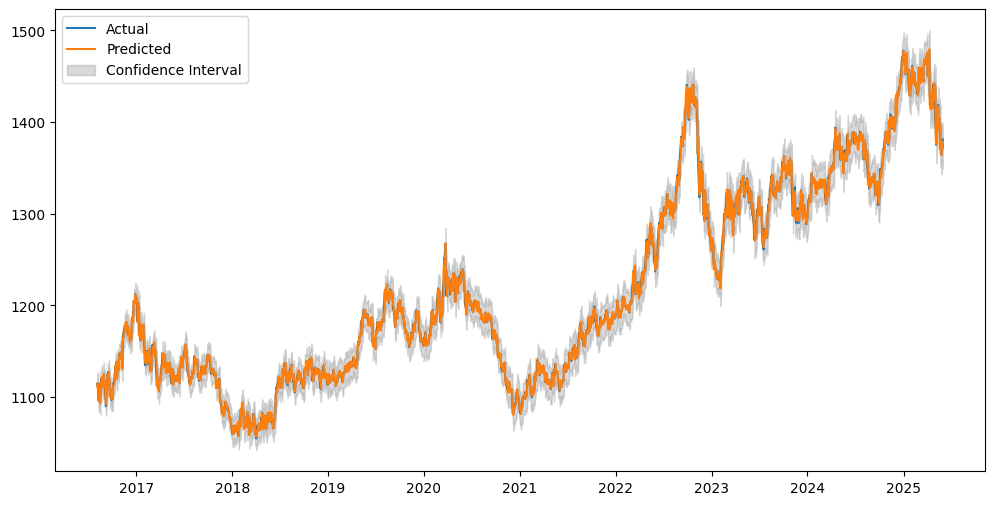

In [65]:
# train/test 분리
index_split = int(len(df) * 0.8)
train_data = df[:index_split]
test_data = df[index_split:]

# 1) ARIMA 최적 모델 찾고 학습 (예시)
import pmdarima as pm
arima_model = pm.auto_arima(train_data, d=None, start_p=0, max_p=5, start_q=0, max_q=5,
                            seasonal=True, m=7, stepwise=True, trace=True)

# 2) ARIMA 잔차로 GARCH 학습
from arch import arch_model
residuals = pd.Series(arima_model.resid())
garch_model = arch_model(residuals, vol='Garch', p=1, q=1, rescale=True)
garch_result = garch_model.fit(disp='off')

# 3) 예측 함수 호출
pred_mean, conf_lower, conf_upper = arima_garch_forecast(
    arima_model,
    garch_result,
    steps=len(test_data),
    index=test_data.index,
    update_with_data=test_data["KRW_per_USD"]
)

# 4) 시각화 등 활용
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(pred_mean.index, pred_mean, label='Predicted')
plt.fill_between(test_data.index, conf_lower, conf_upper, color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()

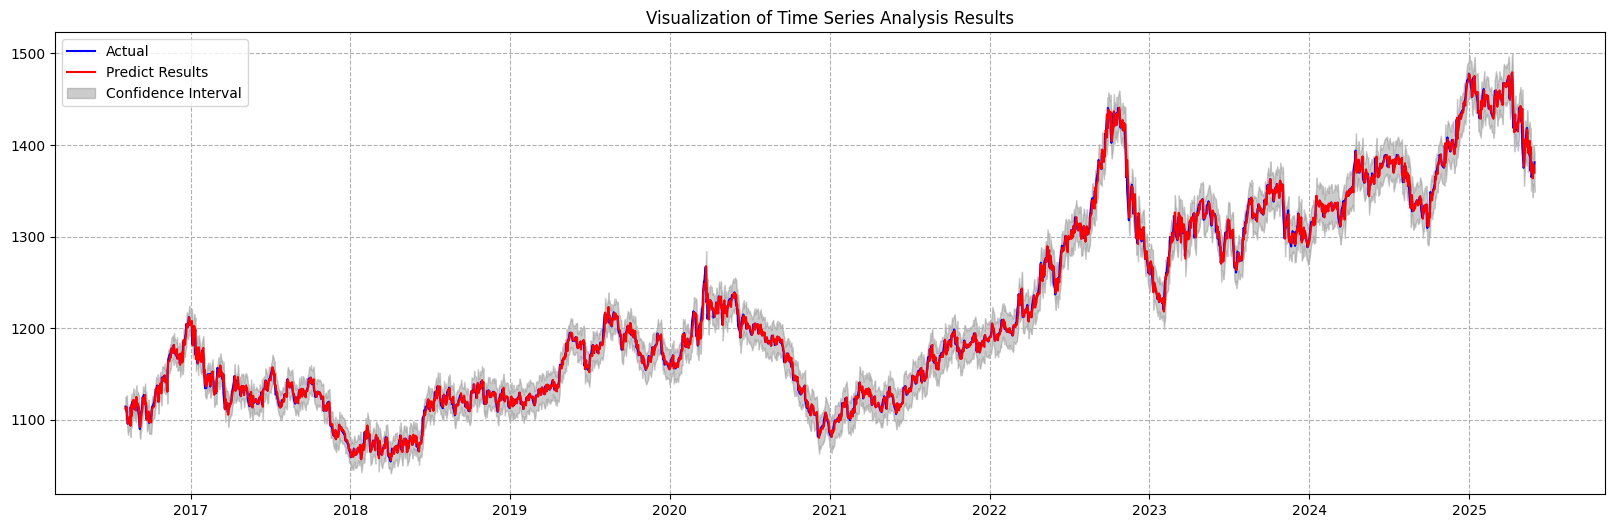

In [ ]:
# 실제 값 (Series 형태로 맞추기)
actual = test_data["KRW_per_USD"]

# 예측 값은 pred_mean 이미 Series라고 가정

# 신뢰구간 Series 생성
lower_series = pd.Series(conf_lower, index=test_data.index)
upper_series = pd.Series(conf_upper, index=test_data.index)

# 시각화
plt.figure(figsize=(20,6))
plt.title("Visualization of Time Series Analysis Results")

# 실제 테스트 데이터
plt.plot(actual.index, actual, label="Actual", color="blue")

# 예측 결과
plt.plot(pred_mean.index, pred_mean, label="Predict Results", color="red")

# 신뢰구간 음영 표시
plt.fill_between(lower_series.index, lower_series, upper_series, color="grey", alpha=0.4, label="Confidence Interval")

plt.legend()
plt.grid(linestyle="--")
plt.show()

### 회귀모델 성능평가하기

In [70]:
# 평가지표 계산
mae = mean_absolute_error(actual, pred_mean)
mse = mean_squared_error(actual, pred_mean)
r2 = r2_score(actual, pred_mean)

print(f"MAE: {mae:.3f}, MSE: {mse:.3f}, R2: {r2:.3f}")


MAE: 4.814, MSE: 42.689, R2: 0.996


In [73]:
import joblib
import pickle

# ARIMA 저장
joblib.dump(arima_model, 'arima_model.pkl')

# GARCH 저장
with open('garch_model.pkl', 'wb') as f:
    pickle.dump(garch_result, f)

In [74]:
import joblib

# ARIMA 불러오기
arima_model = joblib.load('arima_model.pkl')

# GARCH 불러오기
with open('garch_model.pkl', 'rb') as f:
    garch_result = pickle.load(f)

In [ ]:
# 10년 예측 기간: 10년 * 365일 = 3650일 (일 단위 데이터일 때)
forecast_steps = 365 * 10  

# ARIMA-GARCH 모델로 10년 예측 (미래 데이터 없으니 update_with_data 없이 예측)
pred_mean_10yr, conf_lower_10yr, conf_upper_10yr = arima_garch_forecast(
    arima_model,
    garch_result,
    steps=forecast_steps,
    index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'),
    update_with_data=None  # 미래 실제 데이터 없으니 None
)

# 시각화
plt.figure(figsize=(14,7))
plt.plot(df.index, df, label='Historical Data')
plt.plot(pred_mean_10yr.index, pred_mean_10yr, label='10-Year Forecast', color='red')
plt.fill_between(pred_mean_10yr.index, conf_lower_10yr, conf_upper_10yr, color='pink', alpha=0.3, label='Confidence Interval')
plt.title("10-Year Forecast with ARIMA-GARCH Model")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
